In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

from math import sqrt

np.random.seed(5)


# 1. 데이터셋 생성하기
signal_data = pd.read_csv('price33.csv', engine='python', encoding='ms949')
data = signal_data.values
retail_price = data

#std = np.std(df[‘retail_price’].values)

#create_ dataset
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 1:])
        dataY.append(signal_data[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

look_back = 7

X, Y = create_dataset(data, look_back)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
Y

array([28250., 28250., 28250., ..., 25822., 25822., 25822.])

In [3]:
train_stats = signal_data.describe()
train_stats.pop("date")
train_stats = train_stats.transpose()

train_stats


,count,mean,std,min,25%,50%,75%,max
mean(°C),1423.0,13.620379,10.893937,-14.8,4.5,15.0,23.0,33.7
prep(mm),1423.0,3.073717,11.866609,0.0,0.0,0.0,0.2,144.5
humidity(%),1423.0,57.801546,14.823950,21.8,46.8,57.8,67.7,97.0
input,1423.0,57392.404076,117837.321028,0.0,1155.0,22470.0,56922.5,1082233.0
whole_price,1423.0,48076.600843,9486.930097,30000.0,40000.0,47000.0,55000.0,80000.0
retail_price,1423.0,32470.880534,4629.934271,24404.0,28667.0,31851.0,34739.0,45408.0


In [4]:
rtp = retail_price[:,-1]
print(rtp)

[28250. 28250. 28250. ... 25822. 25822. 25822.]


In [5]:
std = np.std(rtp)
print(std)

4628.307163083211


### create dataset을 수행한 뒤 데이터 분할

In [6]:
signal_data.shape

(1423, 7)

In [7]:
# 데이터셋 생성
x_train = X[0:850,]
y_train = Y[0:850,] 

x_val = X[850:1100]
y_val = Y[850:1100]

x_test = X[1100:,]
y_test = Y[1100:,]
y_test_var = y_test


In [8]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(7, 6), activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
#model.add(Dropout(0.3))
model.add(Dense(1))

#3. 모델 아키텍쳐 살펴보기
# model.summary()

# 4. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [9]:
#5.모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=20 ,
    ),
#     ModelCheckpoint(
#     filepath='multi_model.h5',
#     monitor='val_loss',
#     save_best_only = True,
#     )
]


In [10]:
# 5.2 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=300, batch_size=16, callbacks=callbacks_list, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 850 samples, validate on 250 samples
Epoch 1/300





850/850 [==============================] - 4s 5ms/step - loss: 1019461525.6659 - mean_absolute_error: 29956.5362 - val_loss: 650411402.7520 - val_mean_absolute_error: 24643.4769
Epoch 2/300
850/850 [==============================] - 1s 1ms/step - loss: 586341324.4235 - mean_absolute_error: 20381.7824 - val_loss: 235126651.3920 - val_mean_absolute_error: 13423.7303
Epoch 3/300
850/850 [==============================] - 1s 1ms/step - loss: 194094591.9059 - mean_absolute_error: 11220.1321 - val_loss: 164224858.8800 - val_mean_absolute_error: 10515.4156
Epoch 4/300
850/850 [==============================] - 1s 1ms/step - loss: 199206596.1412 - mean_absolute_error: 10977.7616 - val_loss: 139454577.4720 - val_mean_absolute_error: 9332.9876
Epoch 5/300
850/850 [==============================] - 1s 1ms/step - loss: 147168757.4588 - mean

850/850 [==============================] - 1s 1ms/step - loss: 21896672.6071 - mean_absolute_error: 3496.7687 - val_loss: 15618228.5320 - val_mean_absolute_error: 2958.0031
Epoch 79/300
850/850 [==============================] - 1s 1ms/step - loss: 15320216.1765 - mean_absolute_error: 2908.0130 - val_loss: 13642643.1800 - val_mean_absolute_error: 2855.5104
Epoch 80/300
850/850 [==============================] - 1s 1ms/step - loss: 12496980.2485 - mean_absolute_error: 2594.1514 - val_loss: 12613950.2840 - val_mean_absolute_error: 2681.7600
Epoch 81/300
850/850 [==============================] - 1s 1ms/step - loss: 11172483.7906 - mean_absolute_error: 2495.2791 - val_loss: 10090892.2580 - val_mean_absolute_error: 2331.0405
Epoch 82/300
850/850 [==============================] - 1s 1ms/step - loss: 10433460.6371 - mean_absolute_error: 2386.5862 - val_loss: 8336587.7080 - val_mean_absolute_error: 2151.5878
Epoch 83/300
850/850 [==============================] - 1s 1ms/step - loss: 9771361.

In [11]:
# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f" %(model.metrics_names[1], scores[1]))

316/316 [==============================] - 0s 147us/step
mean_absolute_error: 3019.67


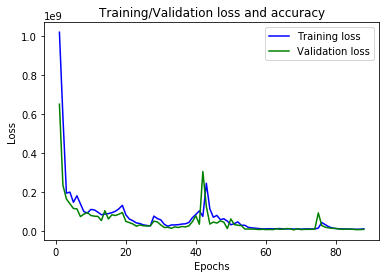

In [14]:
# 6.1 학습과정 살펴보기
#epoch, loss 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']


epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# 6.2. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [11344835.855294118, 2367.7062603400736]
Validataion Score:  [8061079.124, 2166.390779296875]
Test Score:  [16765196.32278481, 3019.6723478293115]


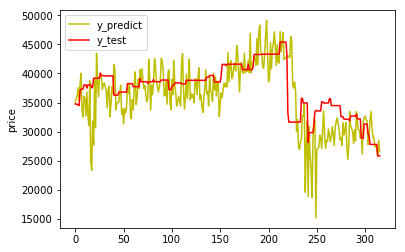

In [16]:
def show_diff(y_predict, y_label, y_test, y_test_label, y_value):

    fig, predict_ax=plt.subplots()

    predict_ax.plot(y_predict, 'y', label=y_label)

    predict_ax.plot(y_test, 'r', label=y_test_label)

    predict_ax.set_ylabel(y_value)

    predict_ax.legend(loc = 'upper left')

    plt.show()
    
#7 예측하기

y_predict = model.predict(x_test).flatten()

show_diff(y_predict, 'y_predict', y_test, 'y_test', 'price')

In [17]:
# 데이터 저장
df = pd.DataFrame(y_predict)
df.insert(1,'y_test',y_test)
df.to_csv('predict_priceinput.csv')

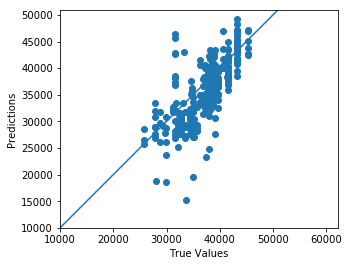

In [18]:

test_predictions = y_test

plt.scatter(y_test, y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10000,plt.xlim()[1]])
plt.ylim([10000,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

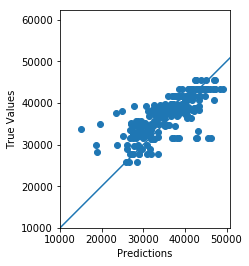

In [24]:

test_predictions = y_test

plt.scatter(y_predict, y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.axis('equal')
plt.axis('square')
plt.xlim([10000,plt.xlim()[1]])
plt.ylim([10000,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

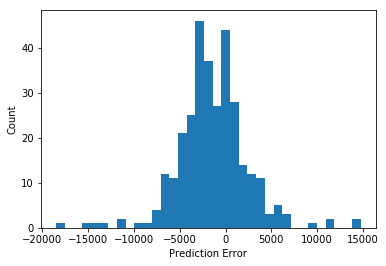

In [25]:
#오차의 분포
error = y_predict - y_test
plt.hist(error, bins = 35)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [26]:
rmse = sqrt(mean_squared_error(y_predict,y_test))
print("RMSE: {:.2f}".format(rmse))

RMSE: 4094.53


In [27]:
print("STD: {:.2f}".format(std))

STD: 4628.31
